In [74]:
import random
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sklearn.linear_model as skllm
import sklearn.neighbors as skln

# Overview of supervised learning

The aim of this notebook is to provide the motivation behind supervised learning methods in statistical learning, i.e. why we prefer to use certain statistical learning methods on certain datasets. The contents of this notebook are largely based on the second chapter of the book ["Elements of Statistical Learning"](https://hastie.su.domains/Papers/ESLII.pdf).

In this notebook, $X$ is the input (also known as feature, predictor or independent variable) while $Y$ is the output (also known as response or dependent variable).

## Linear model 

The linear model is very common in statistics and is structured as follows: suppose we have a input vector $X$ of length $p$, $X^T = (X_1, X_2, \dots, X_p)$ and an output $Y$. The linear model assumes that the input vector can be used to predict the output $Y$ via the expression

$$\hat{Y} = \hat{\beta}_0 + \sum_{j=1}^p X_j\hat{\beta_j}\text{,}$$

where $\hat{Y}$ is the predicted output.

If we include the constant variable $X_0 = 1$ in $X$ and $\hat{\beta}_0$ in the parameter vector $\hat{\beta}$, then we can write the linear model as an inner or dot product:

$$\hat{Y} = X^T\hat{\beta}\text{.}$$

### Fitting the linear model to training data

Our aim now is to find appropriate values for $\hat{\beta}$ so that the linear model _fits_ some training data, i.e. we want to fit the linear model to the training data.

A very common way of fitting a linear model to a set of training data, which we denote by $y_i, x_i$ with $i = 1, 2, \ldots, N$ where $N$ is the number of training data points, is via a _least squares_ approach. The least squares approach is based on minimising the residual sum of squares (RSS):

$$\text{RSS} = \sum (y_i - x^T_i\beta)^2\text{.}$$

Note that $\beta$ here does not have a hat because it is not the fitted or estimated values of $\beta$ but rather the "true" values of $\beta$.

We can write the expression for the RSS in matrix form as:

$$\text{RSS} = (\mathbf{y} - \mathbf{X}\beta)^T(\mathbf{y} - \mathbf{X}\beta)\text{,}$$

where $\mathbf{Y}$ is an $N \times 1$ output vector and $\mathbf{X}$ is an $N \times (p+1)$ input matrix.

To minimise the RSS, we can differentiate the above with respect to $\beta$, set the derivative to 0 and solve for $\beta$. To perform the differentiation, we rely on some computational notation as explained below (this is taken from [this Stack Overflow answer](https://math.stackexchange.com/questions/1111504/differentiation-with-respect-to-a-matrix-residual-sum-of-squares)). First, consider the vector/matrix expressions for $\mathbf{y}$, $\mathbf{X}$ and $\beta$

$$\mathbf{y} = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_N
\end{bmatrix}\text{,}$$

$$\mathbf{X}
= \begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1p} \\
x_{21} & x_{22} & \cdots & x_{2p} \\
\vdots & \vdots & \vdots & \vdots \\
x_{N1} & x_{N2} & \cdots & x_{Np}
\end{bmatrix}
= \begin{bmatrix}
\mathbf{x}_1 \\
\mathbf{x}_2 \\
\vdots \\
\mathbf{x}_N
\end{bmatrix}\text{,}$$

and

$$\beta = \begin{bmatrix}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_p
\end{bmatrix}\text{.}$$

Thus,

$$\mathbf{X}\beta 
= \begin{bmatrix}
\mathbf{x}_1 \beta\\
\mathbf{x}_2 \beta\\
\vdots \\
\mathbf{x}_N \beta
\end{bmatrix}
= \begin{bmatrix}
\sum_{j=1}^{p}b_jx_{1j} \\
\sum_{j=1}^{p}b_jx_{2j} \\
\vdots \\
\sum_{j=1}^{p}b_jx_{Nj}
\end{bmatrix} \implies \mathbf{y}-\mathbf{X}\beta
= \begin{bmatrix}
y_1 - \mathbf{x}_1 \beta\\
y_2 - \mathbf{x}_2 \beta\\
\vdots \\
y_N - \mathbf{x}_N \beta
\end{bmatrix}
= \begin{bmatrix}
y_1 - \sum_{j=1}^{p}b_jx_{1j} \\
y_2 - \sum_{j=1}^{p}b_jx_{2j} \\
\vdots \\
y_N - \sum_{j=1}^{p}b_jx_{Nj}
\end{bmatrix}\text{.}$$

Then, we can express the RSS as:

$$\begin{align}
\text{RSS} &= (\mathbf{y} - \mathbf{X}\beta)^T(\mathbf{y} - \mathbf{X}\beta) \\
&= \begin{bmatrix}
y_1 - \sum_{j=1}^{p}b_jx_{1j} & y_2 - \sum_{j=1}^{p}b_jx_{2j} & \cdots & y_N - \sum_{j=1}^{p}b_jx_{Nj} 
\end{bmatrix} \cdot
\begin{bmatrix}
y_1 - \sum_{j=1}^{p}b_jx_{1j} \\
y_2 - \sum_{j=1}^{p}b_jx_{2j} \\
\vdots \\
y_N - \sum_{j=1}^{p}b_jx_{Nj}
\end{bmatrix} \\
&= \sum_{i=1}^{N}\left(y_i-\sum_{j=1}^{p}b_jx_{ij}\right)^2.
\end{align}$$

Differentiating the RSS with respect to $\beta_k$:

$$\begin{align}
\frac{\partial\text{RSS}}{\partial\beta_k} &= \frac{\partial}{\partial\beta_k} \left( \sum_{i=1}^{N}\left(y_i-\sum_{j=1}^{p}b_jx_{ij}\right)^2 \right) \\
&=  2\sum_{i=1}^{N}\left(y_i-\sum_{j=1}^{p}b_jx_{ij}\right)(-x_{ik}) \\
&= -2\sum_{i=1}^{N}\left(y_i-\sum_{j=1}^{p}b_jx_{ij}\right)x_{ik}.
\end{align}$$

Thus,

$$\begin{align}\dfrac{\partial \text{RSS}}{\partial \beta} &= \begin{bmatrix}
\dfrac{\partial \text{RSS}}{\partial \beta_1} \\
\dfrac{\partial \text{RSS}}{\partial \beta_2} \\
\vdots \\
\dfrac{\partial \text{RSS}}{\partial \beta_p}
\end{bmatrix} \\
&=  \begin{bmatrix}
-2\sum_{i=1}^{N}\left(y_i-\sum_{j=1}^{p}\beta_jx_{ij}\right)x_{i1} \\
-2\sum_{i=1}^{N}\left(y_i-\sum_{j=1}^{p}\beta_jx_{ij}\right)x_{i2} \\
\vdots \\
-2\sum_{i=1}^{N}\left(y_i-\sum_{j=1}^{p}\beta_jx_{ij}\right)x_{ip}
\end{bmatrix} \\
&=  -2\begin{bmatrix}
\sum_{i=1}^{N}\left(y_i-\sum_{j=1}^{p}\beta_jx_{ij}\right)x_{i1} \\
\sum_{i=1}^{N}\left(y_i-\sum_{j=1}^{p}\beta_jx_{ij}\right)x_{i2} \\
\vdots \\
\sum_{i=1}^{N}\left(y_i-\sum_{j=1}^{p}\beta_jx_{ij}\right)x_{ip}
\end{bmatrix} \\
&=  -2\mathbf{X}^{T}(\mathbf{y}-\mathbf{X}\beta).
\end{align}$$

Now setting $\frac{\partial \text{RSS}}{\partial \beta}$ to 0, we get:

$$-2\mathbf{X}^T(\mathbf{y} - \mathbf{X}\beta) = 0 \implies \hat{\beta} = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}\text{,}$$

where $\hat{\beta}$, with the hat, are the fitted or estimated values of $\beta$ that minimises the RSS and fits the linear model to the training data; note that the above expression can only be computed if $\mathbf{X}^T \mathbf{X}$ is non-singular and invertible.

### Fitting the linear model to training data: example 1

Let's do an example where we fit a linear model to some training data relating job performance to mechanical aptitude and conscientiousness. This example takes the data from [Michael Brannick's page about regression with two independent variables](http://faculty.cas.usf.edu/mbrannick/regression/Part3/Reg2.html).

First, we need to get the raw data and convert it into a training set with a format suitable for the upcoming computations in our code. Namely, we need a single input matrix $\mathbf{X}$ containing all of the input data, rather than individual arrays holding the input data separately. This is because we need a single input matrix $\mathbf{X}$ when using the formula $\hat{\beta} = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$.

In [75]:
# raw data from http://faculty.cas.usf.edu/mbrannick/regression/Part3/Reg2.html
def convert_raw_data_into_training_set():
    mechanical_aptitude = [40,45,38,50,48,55,53,55,58,40,55,48,45,55,60,60,60,65,50,58]
    conscientiousness   = [25,20,30,30,28,30,34,36,32,34,38,28,30,36,34,38,42,38,34,38]
    job_performance     = [1,2,1,3,2,3,3,4,4,3,5,3,3,2,4,5,5,5,4,3]

    # adding 1 so that the intercept is included in the beta parameter vector
    X = np.array( [ [1, x1, x2] for x1, x2 in zip(mechanical_aptitude, conscientiousness) ] )
    y = np.array(job_performance)
    
    return X, y 

It would also be helpful to visualise what our training data looks like.

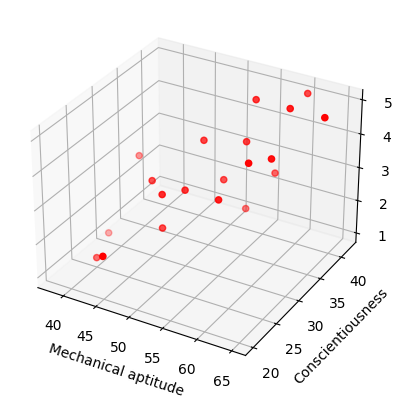

In [263]:
def visualise_training_set():
    X, y = convert_raw_data_into_training_set()
    
    X1 = X[:,1] # mechanical aptitude
    X2 = X[:,2] # conscientiousness
    
    fig = plt.figure()
    ax  = fig.add_subplot(projection="3d")
    
    ax.set_xlabel("Mechanical aptitude")
    ax.set_ylabel("Conscientiousness")
    ax.set_zlabel("Job performance")
    
    ax.scatter(X1, X2, y, color='r')

visualise_training_set()

Next, we write a function to fit a linear model to this data using the formula $\hat{\beta} = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$.

In [77]:
def fit_linear_model_using_formula():
    X, y = convert_raw_data_into_training_set()

    # formula for fitting linear model is beta = (X^T*X)^-1*X^T*y
    beta_hat = np.matmul(
        np.linalg.inv( np.matmul(np.transpose(X), X) ),
        np.matmul(np.transpose(X), y)
    )
    
    return beta_hat[0], beta_hat[1], beta_hat[2]

We can confirm that the fitted parameters are correct by doing the fitting using `scikit-learn`* as well and checking that we get the same fitted parameters.

*Note that we have to exclude the 1's from the input matrix when using `scikit-learn`, which we originally included to also compute the intercept using the formula, because `scikit-learn` by default calculates the intercept and the other parameters separately.

In [78]:
def fit_linear_model_using_sklearn():
    X, y = convert_raw_data_into_training_set()

    # excluding intercept using X[:,1:]
    lm = skllm.LinearRegression(fit_intercept=True).fit(X[:,1:],y)
    
    return lm.intercept_, lm.coef_[0], lm.coef_[1]

In [79]:
def check_fitted_parameters_formula_vs_sklearn():
    beta_hat_formula = fit_linear_model_using_formula()
    beta_hat_sklearn = fit_linear_model_using_sklearn()
    
    print("Beta hat using scikit-learn")
    print("Difference intercept:", beta_hat_sklearn[0]-beta_hat_formula[0])
    print("Difference beta_1:", beta_hat_sklearn[1]-beta_hat_formula[1])
    print("Difference Beta_2:", beta_hat_sklearn[2]-beta_hat_formula[2])

check_fitted_parameters_formula_vs_sklearn()

Beta hat using scikit-learn
Difference intercept: -7.993605777301127e-15
Difference beta_1: 7.771561172376096e-16
Difference Beta_2: -1.1379786002407855e-15


The fitted parameters are very close to each other to more than 10 decimal places, confirming that we have used the formula correctly to fit the linear the model to the training set.

As a concluding step, we would like to visualise the fitted linear model against the training data.

In [80]:
def generate_meshgrid_points_for_trained_model(
    X_train
):
    # getting meshgrid limits from training set
    min_x1 = np.min( X_train[:,0] )
    max_x1 = np.max( X_train[:,0] )
    min_x2 = np.min( X_train[:,1] )
    max_x2 = np.max( X_train[:,1] )
    
    # generating meshgrid points
    X1, X2 = np.meshgrid(np.linspace(min_x1,max_x1,100), np.linspace(min_x2,max_x2,100))
    
    points = []
    
    for j in range(X1.shape[0]):
        for i in range(X1.shape[1]):
            points.append([X1[j,i], X2[j,i]])
    
    return X1, X2, np.array(points)

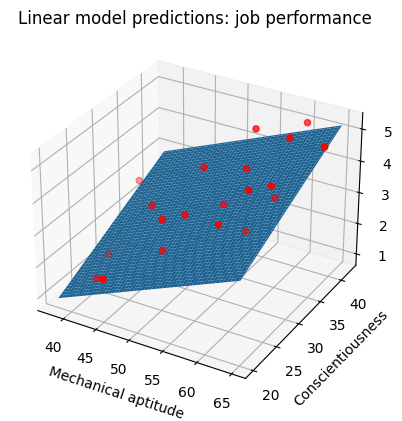

In [81]:
def visualise_linear_model():
    X, y = convert_raw_data_into_training_set()

    beta_hat = fit_linear_model_using_formula()
    
    X1_mesh, X2_mesh, points = generate_meshgrid_points_for_trained_model( X[:,1:] )

    predictions = beta_hat[0] + beta_hat[1] * X1_mesh + beta_hat[2] * X2_mesh

    fig = plt.figure()
    ax  = fig.add_subplot(projection="3d")

    ax.set_xlabel("Mechanical aptitude")
    ax.set_ylabel("Conscientiousness")
    ax.set_title("Linear model predictions: job performance")

    ax.computed_zorder = False
    
    ax.scatter(X[:,1], X[:,2], y, color='r', zorder=2, label="Training data")
    ax.plot_surface(X1_mesh, X2_mesh, predictions, zorder=1, label="Linear model")

    #ax.legend()
    
visualise_linear_model()

## k-nearest-neighbours model

Unlike the linear model, which assumes that the input vector $X$ can be used to predict the output $Y$ via the linear relationship $\hat{Y} = X^T \hat{\beta}$, the k-nearest neighbours model (kNN) predicts the output $Y$ as follows:

$$\hat{Y}(X) = \frac{1}{k} \sum_{x_i \in N_k(X)} y_i \text{,}$$

where $N_k(X)$ is the neighbourhood containing the k-nearest neighbours around $X$. Essentially, the kNN model predicts $Y$ by taking the average of the responses in the training data that are closest to $X$.

### Fitting a kNN model to training data: example 1

We would like to see how the kNN model predictions are different from the linear model predictions after fitting to the training data from the previous example.

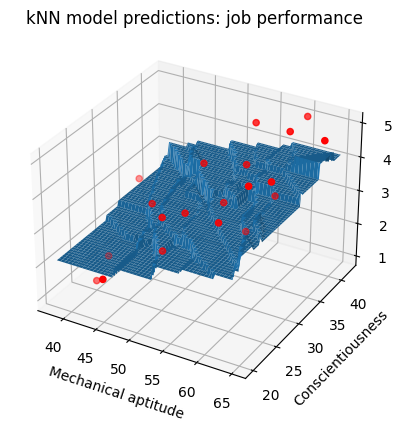

In [82]:
def visualise_knn_model():
    X, y = convert_raw_data_into_training_set()

    beta_hat = fit_linear_model_using_formula()
    
    X1_mesh, X2_mesh, points = generate_meshgrid_points_for_trained_model( X[:,1:] )

    knn = skln.KNeighborsRegressor(n_neighbors=7).fit(X[:,1:],y)

    predictions = knn.predict(points)

    fig = plt.figure()
    ax  = fig.add_subplot(projection="3d")

    ax.set_xlabel("Mechanical aptitude")
    ax.set_ylabel("Conscientiousness")
    ax.set_title("kNN model predictions: job performance")

    ax.computed_zorder = False
    
    ax.scatter(X[:,1], X[:,2], y, color='r', zorder=2, label="Training data")
    ax.plot_surface(X1_mesh, X2_mesh, predictions.reshape(X2_mesh.shape), zorder=1, label="kNN model")

    #ax.legend()
    
visualise_knn_model()

As we can see, the kNN model makes predictions after getting fitted to the training data, but the predictions are different in structure compared to those from the linear model.

## Linear model vs kNN model: example 2

We would like do another example to see the difference between the linear model and the kNN model. This example uses simulated training data, simulated as follows. First, the training data consists of two classes, blue and orange. Blue is zero and orange is one. For the blue and orange data, we generate 10 means $m_i$ from bivariate Guassian distributions $N((1,0)^T, \mathbf{I})$ and $N((0,1)^T, \mathbf{I})$, respectively. Then, we generate data for each class by uniformly and randomly picking $m_i$ and sampling from a bivariate Guassian distribution $N(m_i, \mathbf{I}/5)$.

In [83]:
def generate_ten_means(
    bivariate_mean
):
    return [ sps.multivariate_normal(mean=bivariate_mean, cov=1).rvs() for _ in range(10) ]

This is a function to generate 10 means $m_i$ from bivariate Guassian distributions $N((1,0)^T, \mathbf{I})$ and $N((0,1)^T, \mathbf{I})$.

In [84]:
def generate_samples_from_ten_bivariate_guassians(
    means,
    sample_size,
    response_value
):
    random_bivariate_gaussians = [sps.multivariate_normal(mean=mean, cov=0.2) for mean in means]
    
    sample_points, responses = [], []
    
    for _ in range(sample_size):
        idx = random.randint(0,9)
        
        sample_points.append( random_bivariate_gaussians[idx].rvs() )
        
        responses.append(response_value)
        
    return np.array(sample_points), np.array(responses)

This is a function to generate data for each class by uniformly and randomly picking $m_i$ and and sampling from a bivariate Guassian distribution $N(m_i, \mathbf{I}/5)$.

In [85]:
def generate_simulated_data(
    sample_size,
    blue_means,
    orange_means
):
    # half of samples are blue points which have a response value of 1
    blue_sample_points, blue_responses = generate_samples_from_ten_bivariate_guassians(
        means=blue_means,
        sample_size=sample_size//2,
        response_value=1
    )
    
    # half of samples are orange points which have a response value of 0
    orange_sample_points, orange_responses = generate_samples_from_ten_bivariate_guassians(
        means=orange_means,
        sample_size=sample_size//2,
        response_value=0
    )
    
    # joining blue and orange points into complete training/test set 
    X = np.concatenate( (blue_sample_points, orange_sample_points) )
    y = np.concatenate( (blue_responses, orange_responses) )
    
    return X, y

This is a function to generate data for both classes and thus generate the entire simulated training set.

In [86]:
blue_means   = generate_ten_means( bivariate_mean=[1,0] )
orange_means = generate_ten_means( bivariate_mean=[0,1] )

N_train = 200

X_train, y_train = generate_simulated_data(
    sample_size=N_train,
    blue_means=blue_means,
    orange_means=orange_means
)

Having generated the simulated training set, we would like to fit both a linear model and kNN model to the training set and see how the predictions differ. The predictions are handled as follows: any prediction less than 0.5 is classified zero, i.e. blue, whereas any prediction greater than 0.5 is classified as one, i.e. orange. Any predictions exactly equal to 0.5 are on the "decision boundary", which we will plot to see the difference in predictions from the linear vs kNN model

In [87]:
def plot_decision_boundary(
    X_train,
    y_train,
    model,
    model_name
):
    X1, X2, points = generate_meshgrid_points_for_trained_model(X_train)
    
    lm = model.fit(X_train,y_train)
    
    predictions = model.predict(points)
    
    # plotting
    fig, ax = plt.subplots()
    
    blue_train   = X_train[ np.where(y_train==1)[0] ]
    orange_train = X_train[ np.where(y_train==0)[0] ]
    
    # plotting training set
    ax.scatter(blue_train[:,0], blue_train[:,1])
    ax.scatter(orange_train[:,0], orange_train[:,1])
    
    # plotting predictions from trained models
    ax.contour(X1, X2, predictions.reshape(X1.shape),  levels=[0.5], colors="black")
    
    ax.set_title("Decision boundary: " + model_name)

This is a function for plotting the decision boundary predicted by a model.

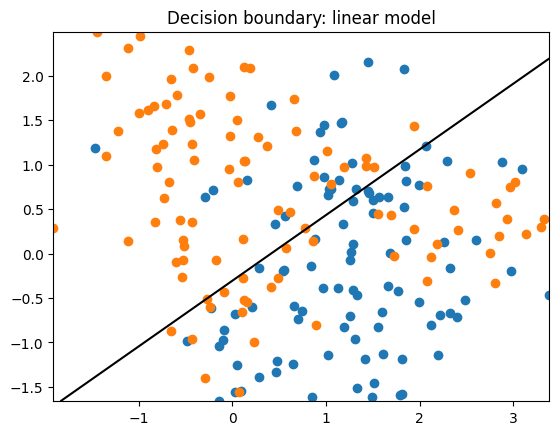

In [88]:
plot_decision_boundary(
    X_train=X_train,
    y_train=y_train,
    model=skllm.LinearRegression(),
    model_name="linear model"
)

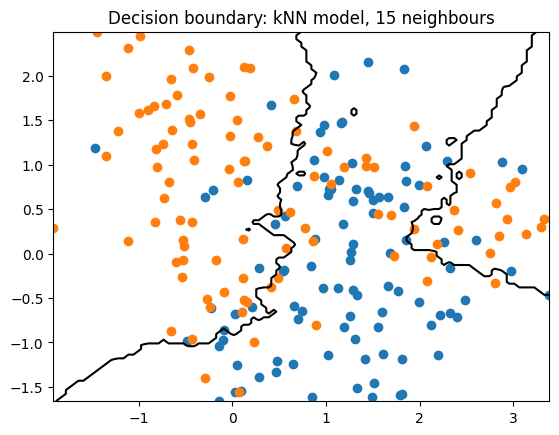

In [89]:
plot_decision_boundary(
    X_train=X_train,
    y_train=y_train,
    model=skln.KNeighborsRegressor(n_neighbors=15),
    model_name="kNN model, 15 neighbours"
)

The kNN model is trained using $k = 15$, i.e. the 15 nearest neighbours.

We can see that the kNN model has fewer mispredictions (i.e. where a blue is wrongly classified as orange and vice versa) than the linear model, but this is not necessarily good. To understand why, consider retraining the kNN model using $k = 1$ and plotting the decision boundary: 

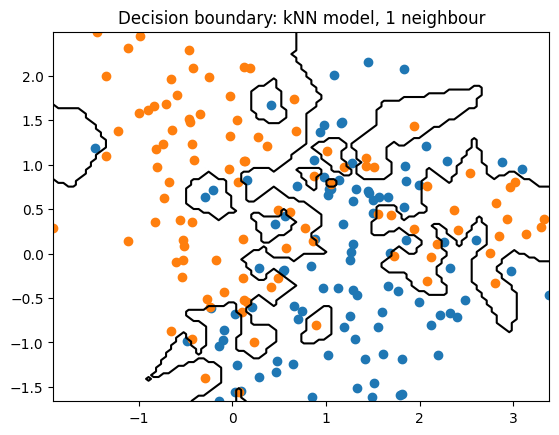

In [90]:
plot_decision_boundary(
    X_train=X_train,
    y_train=y_train,
    model=skln.KNeighborsRegressor(n_neighbors=1),
    model_name="kNN model, 1 neighbour"
)

Now, the kNN model doesn't make any mispredictions, but it will only do so well for this specific training data: on other data, it is probably going to make far more mispredictions. Instead of testing for mispredictions on the same data used to train the model, it is better to test for mispredictions using a seperate dataset, which is commonly called the "test set". We generate a test dataset of 10,000 samples by rerunning `generate_simulated_data`.

In [91]:
N_test = 10_000

X_test, y_test = generate_simulated_data(
    sample_size=N_test,
    blue_means=blue_means,
    orange_means=orange_means
)

Having generated the test set, we would like to see the prediction error of the kNN model for the test set against different values of $k$. Note that even though it seems like the kNN model has only a single parameter, $k$, compared to $p+1$ parameters of the linear model (parameter vector $\hat{\beta}$ of length $p+1$), the effective number of parameters is $N/k$; to visualise why this is, consider that there would be $N/k$ neighbourhoods if the neighbourhoods were non-overlapping.

We now plot the prediction error of the kNN model against the number of parameters or the _degrees of freedom_ (DOF). The prediction error of the linear model is also included for reference, which has three DOF.

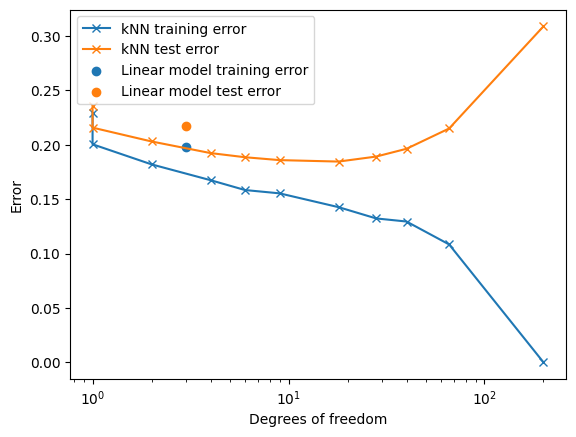

In [92]:
def plot_error_against_degrees_of_freedom_lm_vs_knn(
    X_train,
    y_train,
    X_test,
    y_test
):
    lm = skllm.LinearRegression().fit(X_train,y_train)
    
    training_predictions_lm = lm.predict(X_train)
    test_predictions_lm     = lm.predict(X_test)
    
    training_error_lm = np.square(y_train - training_predictions_lm).mean()
    test_error_lm     = np.square(y_test  - test_predictions_lm).mean()
    
    neighbors = [1, 3, 5, 7, 11, 21, 31, 45, 69, 101, 151]
    
    training_errors_knn = []
    test_errors_knn     = []
    
    degrees_of_freedom_knn = []
    
    for k in neighbors:
        # if neighborhoods are non-overlapping,
        # then with k nearest neighbors we would have N/k neighborhoods,
        # which is the effective degrees of freedom
        degrees_of_freedom_knn.append(N_train//k)
        
        knn = skln.KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
        
        training_predictions_knn = knn.predict(X_train)
        test_predictions_knn     = knn.predict(X_test)
        
        training_error_knn = np.square(y_train - training_predictions_knn).mean()
        test_error_knn     = np.square(y_test  - test_predictions_knn).mean()
        
        training_errors_knn.append(training_error_knn)
        test_errors_knn.append(test_error_knn)
        
    fig, ax = plt.subplots()
    
    ax.plot(degrees_of_freedom_knn, training_errors_knn, marker='x', label="kNN training error")
    ax.plot(degrees_of_freedom_knn, test_errors_knn,     marker='x', label="kNN test error")
    
    ax.scatter(3, training_error_lm, label="Linear model training error")
    ax.scatter(3, test_error_lm,     label="Linear model test error")
    
    ax.set_ylabel("Error")
    ax.set_xlabel("Degrees of freedom")
    ax.set_xscale("log")
    ax.legend()
    
plot_error_against_degrees_of_freedom_lm_vs_knn(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

As seen above, for the training set, the prediction error of the kNN model goes down as the DOF increases, reaching 0 when 200 DOF are reached (equivalent to $k = 1$ for training set with $N = 200$). For the test set however, the same does not happen: the prediction error sharply increases as 200 DOF or $k = 1$ is reached. Rather, the prediction error lowest at a sweet spot between between 1 and 200 DOF.

### Linear model vs kNN model: when to use which?

The decision boundary predicted by the linear model is evidently linear and smooth compared to the kNN decision boundary. Furthermore, the linear model is apparently easy to fit to the training data. However, there is an underlying assumption that a linear boundary is appropriate, which as we have seen above is not true - in language we will soon develop, the linear model has low variance and high bias.

On the other hand, the kNN decision boundary does not have any underlying assumptions and can adapt to any training data. However, the decision boundary is very sensitive to the neighbouring training data around a particular point and is therefore unstable - the kNN model has low bias but high variance.

Whether to use the linear or kNN model depends entirely on the structure of the training data. Indeed, variations on these two models form a large subset of modern statistical learning methods.

## Statistical learning theory: building models by minimising prediction error

So far, we have discussed two models informally - the linear model and the kNN model - but we need a theoretical framework under which to build these kinds of models. To make such a framework, we will work with probability. 

In our framework, let $X \in R^p$ denote an random input vector and $Y$ a random output variable, and suppose they have a joint probability density function $P(X,Y)$. We want to build a model $f(X)$ that predicts $Y$ given $X$ - we do this by taking $f(X)$ to be the function that minimises the expected prediction error (EPE),

$$\text{EPE}(f) = E[L(Y, f(X))]\text{,}$$

where $L(Y, f(X))$ is a "loss function" that computes the prediction error. The most common and convenient loss function is the squared error loss function $L(Y, f(X)) = (Y - f(X))^2$. Thus,

$$\text{EPE}(f) = E[(Y, f(X))^2]\text{.}$$

The rest of this derivation about EPE is taken from [this StackOverflow answer](https://stats.stackexchange.com/questions/92180/expected-prediction-error-derivation). First, let's refresh our intuition about computing expected values by considering the discrete case, namely by considering how to compute the expected value of an RV $g$ with joint probability mass function $g(X,Y)$:

$$\begin{align}
E_{X,Y}[g(X,Y)] &= \sum_{x,y}g(X,Y)P(X=x, Y=y) \\
                &= \sum_{x,y}g(X,Y)P(Y=y \mid X=x)P(X=x) \\
                &= \sum_x(\sum_y g(X,Y)P(Y=y \mid X=x))P(X=x) \\
                &= E_X\left[\sum_y g(X,Y)P(Y=y \mid X=x)\right] \\
                &= E_X\left[E_{Y \mid X}[g(X,Y)]\right].
\end{align}$$

Similarly, we can compute EPE as:

$$\begin{align}
\text{EPE}(f) &= E[(Y, f(X))^2] \\
              &= \int (y - f(x))^2 P(dx,dy) \\
              &= \int_x \int_y (y - f(x))^2 P(x,y)dxdy \\
              &= \int_x \int_y (y - f(x))^2 P(y | x)P(x)dxdy \\
              &= \int_x E_{Y | X}[(y - f(x))^2 | X = x]P(x)dx \\
              &= E_X[E_{Y | X}[(y - f(x))^2 | X]]
\end{align}.$$

Recall that we build the model $f(X)$ by constructing a function that minimises EPE. We minimise EPE by minimising "pointwise":

$$f(x) = \text{arg min}_c E_{Y|X}[(Y-c)^2|X=x].$$

To understand what pointwise means, consider again the discrete case above, let $g(X,Y) = (Y - f(X))^2$, then consider the third line of the derivation, i.e.

$$E_{X,Y}[(Y - f(X))^2] = \sum_x(\sum_y (Y - f(X))^2 P(Y=y \mid X=x)) P(X=x).$$

The expected value can be minimised by minimising the summation $\sum_x \sum_y$, which in turn can be minimised by minimising each summand in in the inside summation $\sum_y$. In other words, by minimising every discrete point in the inside summation, we minimise the summation as a whole; this is achieved by picking $f(X) = E[Y|X=x]$ at each discrete point, i.e. pointwise.

Similarly, to minimise EPE, we construct $f(x)$ by picking $c$ at every point such that the loss is minimised. This occurs if we construct $f(x)$ as

$$f(x) = E[Y|X=x]\text{*,}$$

i.e. we construct $f(x)$ to be the expected value of $Y$ at a given point $X$. By doing so, the loss becomes zero and EPE is minimised; $f(x)$
is called as the _regression function_.

This theoretical construction of $f(X)$ is approximated by the kNN model directly: it says that the expected value of $Y$ at a given point $X$ is the average of the $k$ nearest neighbours around the point. The approximation involves two aspects:

1. The expected value is estimated via the average;
2. Instead of looking _at_ the point, the kNN model looks _around_ the point.

The kNN model appears to give us a universal estimator, but it practice it fails because of two reasons:

1. The training set does not have enough data points for aspects (1) and (2) to be valid;
2. In higher dimensions, the rate of convergence of the approximation to the truth is too slow, which we will show later.

Often, our training set is not very large so we cannot use the kNN model. Instead of using the kNN model, we might use a linear or other structured model to exploit some kind of regularity or structure in the data (if any) to get a more stable estimate. Said differently, we specify a particular model for the regression function $f(x)$ and assume this model fits the shape of $P(X,Y)$ or the structure of the data in some way - this is a model-based approach. However, the model-based approach is only accurate if our assumption - the specified model fits the shape of $P(X,Y)$ or the structure of the data in some way - is actually true.

For example, suppose the linear model actually fits the shape of $P(X,Y)$ in some way. Thus, it is accurate to assume the regression function $f(x) = x^T \beta$. Substituting $f(x)$ into the expression for EPE, differentiating with respect to $\beta$, setting the derivative to zero and solving for $\beta$ to find the values that minimise the expectation, we get

$$\beta = (E[XX^T])^{-1}E[XY].$$

In the least squares formula, these expectations are approximated by averaging over the finite training set.

*Using the absolute loss error function will give the conditional median instead of the conditional mean (for the intuition, see [here for example](https://math.stackexchange.com/questions/113270/the-median-minimizes-the-sum-of-absolute-deviations-the-ell-1-norm)).

## Curse of dimensionality

As mentioned, the kNN models fails to be a universal estimator in higher dimensions. Consider the kNN model's behaviour wherein the inputs are uniformly distributed in a $p$-dimensional unit cube: to capture a volume fraction $f$ of the cube, the kNN model needs to use a sub-cube with edge length $f^{1/p}$. The latter formula allows us to plot the volume fraction of the cube captured by a given edge length.

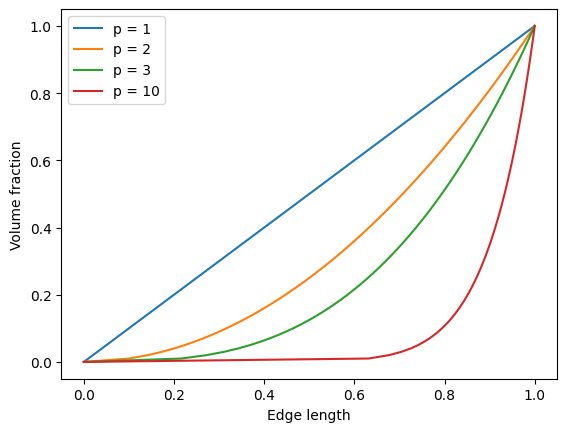

In [93]:
def plot_edge_length_against_volume_fraction_for_different_dimensions():
    dimensions = [1,2,3,10]
    volume_fractions = np.linspace(0,1,100)
    
    fig, ax = plt.subplots()
    
    for p in dimensions:
        edge_length = volume_fractions ** (1 / p)
        
        ax.plot(edge_length, volume_fractions, label="p = %s" % p)
    
    ax.set_xlabel("Edge length")
    ax.set_ylabel("Volume fraction")
    ax.legend()

plot_edge_length_against_volume_fraction_for_different_dimensions()

We can see that for $p = 10$, to capture a volume fraction that is not essentially zero, an edge length larger than 0.6 is needed, but the edge of the cube itself 1; thus, an edge length of 0.6 not really "local" anymore. 

Another problem is that in higher dimensions, all the sample points are close to the boundaries of the sample space. Consider $N$ data points uniformly distributed in a $p$-dimensional sphere: the median distance $d$ from the origin to the closest data point is given by

$$d(p,N) = \left( 1 - \frac{1}{2}^{\frac{1}{N}} \right)^{\frac{1}{p}}.$$

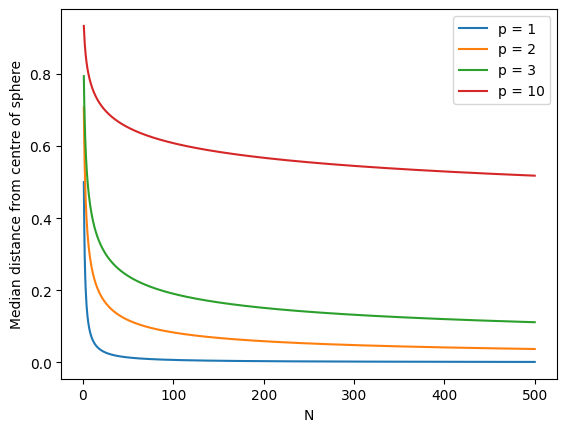

In [113]:
def plot_median_distance_against_p_and_N():
    dimensions = [1,2,3,10]
    N = np.linspace(1,500,1000)
    
    fig, ax = plt.subplots()
    
    for p in dimensions:
        d = ( 1 - 0.5 ** (1 / N) ) ** (1 / p)
        
        ax.plot(N, d, label="p = %s" % p)
    
    ax.set_xlabel("N")
    ax.set_ylabel("Median distance from centre of sphere")
    ax.legend()

plot_median_distance_against_p_and_N()

For $N = 500$ and $p = 10$, $d \approx 0.52$, more than halfway to the boundary of the sample space; hence, most data points are closer to boundary than to any other data point. This is problematic because prediction is more difficult near the boundary: the kNN model has to extrapolate from neighbouring points instead of interpolating between them.

Lastly, the sampling density is proportional to $N^{\frac{1}{p}}$; if $N_1 = 100$ is a dense sample for a single input problem, then $N_{10} = 100^{10}$ is sample size needed to get the same sample density for a 10-input problem.

### Simulated examples of the curse of dimensionality

We will explore the curse of dimensionality using simulated examples. Suppose the true relationship between $X$ and $Y$ is

$$Y = f(X) = \exp(-8 ||X||^2)$$

without any measurement error, i.e. the relationship is deterministic. Using the relationship, we generate a training set with $N = 1000$ sample points generated uniformly on $[-1,1]^p$. Using this training set, we train a one-nearest neighour model, denoted by $\hat{f}$, and we compute the mean squared error (MSE) of the model's prediction at $x_0$ against the dimension $p$:

$$\begin{align}
\text{MSE}(x_0) &= E_T\left[(f(x_0) - \hat{y_0})^2\right] \\
                &= E_T\left[\left((f(x_0) + E_T[{\hat{y_0}}]) - (E_T[{\hat{y_0}}] - \hat{y_0})\right)^2\right] \\
                &= E_T\left[(f(x_0) + E_T[{\hat{y_0}}])^2 - (f(x_0) + E_T[{\hat{y_0}}])(E_T[{\hat{y_0}}] - \hat{y_0}) + (E_T[{\hat{y_0}}] - \hat{y_0})^2\right] \\
                &= E_T\left[(E_T[{\hat{y_0}}] - f(x_0))^2\right] - (f(x_0) + E_T[{\hat{y_0}}])(E_T[{\hat{y_0}}] - E_T[\hat{y_0}]) + (\hat{y_0} - E_T[{\hat{y_0}}])^2 \\
                &= \text{Bias}^2(\hat{y_0}) + 0 + V[\hat{y_0}] \\
                &= \text{Bias}^2(\hat{y_0}) + V[\hat{y_0}]
\end{align},$$

where $x_0 = 0$, $f(x_0)$ is the true value at $x_0$, $\hat{y}_0 = \hat{f}(x_0)$ is the model's prediction at $x_0$, and $\text{Bias}(\hat{y_0}) = E_T\left[{\hat{y_0}} - f(x_0)\right]$; $E_T[{.}]$ denotes the expectation over the training set, which means that to compute MSE, we need to average over many 1NN models trained using different training sets.

#### Plot of $f(X)$

Before plotting MSE against $p$, we want to explain want kind of behaviour we expect from the 1NN model given $f(X)$. First, we plot $f(X)$:

In [212]:
def plot_functional_relationship(
    relationship_function,
    plot_title
):
    x = np.linspace(-1,1,100)
    
    y = relationship_function(x)
    
    fig, ax = plt.subplots()
    
    ax.plot(x,y)
    
    ax.set_title(plot_title)

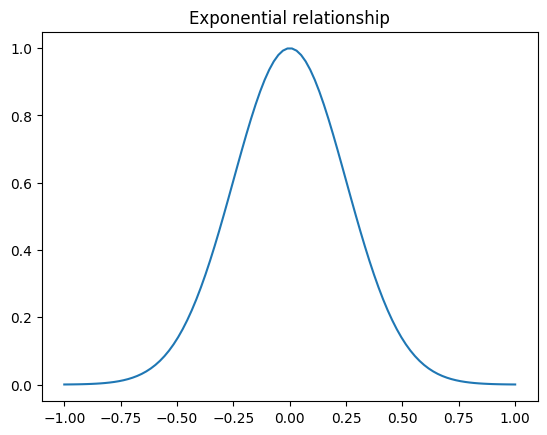

In [213]:
plot_functional_relationship(
    relationship_function=lambda x : np.exp( -8 * np.square(x) ),
    plot_title="Exponential relationship"
)

We can see that the relationship peaks at $x_0 = 0$ and tends towards one the further we move away from $x_0$. Thus, the more often the nearest neighbour is not exactly at $x_0$, the more we expect the MSE to tend towards one.

#### Plots of nearest neighbours from $x_0$ for $p = 1, 2$

The further we are from $x_0$, the larger we expect MSE to be; thus, it might be interesting to plot how far the nearest neighbour is from $x_0$ for $p = 1, 2$:

In [214]:
def generate_p_dimensional_uniform_sample_between_one_and_minus_one(
    p
):
    uniform_between_one_and_minus_one = sps.uniform(loc=-1, scale=2)
    
    x = [ uniform_between_one_and_minus_one.rvs() for _ in range(p) ]
    
    return x

In [215]:
def generate_several_p_dimensional_sample_points(
    p,
    sample_size
):
    sample_points = np.array(
        [
            generate_p_dimensional_uniform_sample_between_one_and_minus_one(p)
            for _ in range(sample_size)
        ]
    )
    
    return sample_points

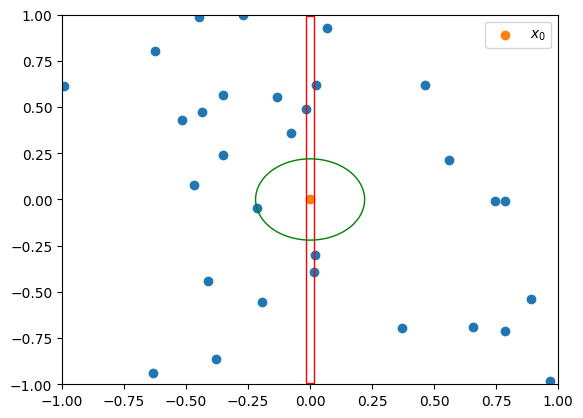

In [216]:
def plot_neighbours_one_vs_two_dimensions():
    X_2D = generate_several_p_dimensional_sample_points(p=2, sample_size=30)
    
    X1 = [ [ point[0] ] for point in X_2D ]
    X2 = [ [ point[1] ] for point in X_2D ]
    
    X_1D = X1
    
    nn_2D = skln.NearestNeighbors(n_neighbors=1).fit(X_2D)
    nn_1D = skln.NearestNeighbors(n_neighbors=1).fit(X_1D)
    
    distance_nn_2D = nn_2D.kneighbors([[0,0]])[0][0][0]
    distance_nn_1D = nn_1D.kneighbors([[0]])[0][0][0]
    
    fig, ax = plt.subplots()
    
    ax.scatter(X1,X2)
    ax.scatter(0,0,label="$x_0$")
    
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    
    rectangle_height = np.max(X2) - np.min(X2)
    rectangle_width  = 2*distance_nn_1D
    
    rectangle = patches.Rectangle(
        (0-rectangle_width/2, 0-rectangle_height/2), 
        rectangle_width, 
        rectangle_height, 
        linewidth=1, 
        edgecolor='r', 
        facecolor="None"
    )
    
    ax.add_patch(rectangle)
    
    radius = distance_nn_2D
    
    circle = patches.Circle(
        (0,0), 
        radius=radius, 
        linewidth=1, 
        edgecolor='g', 
        facecolor="None"
    )
    
    ax.add_patch(circle)

    ax.legend()
    
plot_neighbours_one_vs_two_dimensions()

The rectangle shows the distance from $x_0$ in 1D whereas the circle shows the distance in 2D: the nearest neighbour to $x_0$ is farther in 2D than 1D.

#### Plot of distance against $p$

It is interesting to consider how the distance would vary against $p$ (and therefore the MSE, because the further the distance the higher we expect the MSE to be):

In [217]:
def exponential(
    sample_points
):
    norms = np.apply_along_axis(np.linalg.norm, axis=1, arr=sample_points)
    
    return np.exp( -8 * np.square(norms) )

In [218]:
def compute_samples_from_functional_relationship(
    sample_size,
    p,
    relationship_function,
    stochastic
):
    # generating several p-dimensional sample points
    sample_points = np.fromfunction(
        function=lambda i, j : sps.uniform.rvs(loc=-1+i-i+j-j, scale=2),
        shape=(sample_size,p)
    )
    
    responses = relationship_function(sample_points)
    
    if stochastic:
        epsilon = np.fromfunction(
            function=lambda i : sps.norm.rvs(loc=0+i-i),
            shape=(sample_size,)
        )
        
        responses += epsilon
    
    return sample_points, responses

In [219]:
def train_model(
    p,
    relationship_function,
    model,
    stochastic
):
    # generating training data from determistic relationship, sample size 1000
    X, y = compute_samples_from_functional_relationship(
        sample_size=500, 
        p=p, 
        relationship_function=relationship_function,
        stochastic=stochastic
    )
    
    # training kNN model with one nearest neighbor
    predictor = model.fit(X,y)
    
    return predictor

In [220]:
def compute_MSE_or_EPE(
    p,
    num_samples,
    relationship_function,
    model,
    is_knn,
    stochastic
):
    y0hats    = []
    distances = []
    
    # training a series of one nearest neighbour models for exponential relationship
    for _ in range(num_samples):
        predictor = train_model(
            p=p,
            relationship_function=relationship_function,
            model=model,
            stochastic=stochastic
        )
        
        # p-dimensional zero vector
        # reshape advice given by sklearn so that .predict(x0) works if inputting a single sample point
        x0 = np.array( [0 for _ in range(p)] ).reshape(1, -1)
        
        # true value from deterministic relationship
        y0 = relationship_function(sample_points=x0)
        
        # predicted value from kNN model trained with 1000 samples
        y0hat = predictor.predict(x0)
        
        # distance of nearest neighbour from zero vector
        distance = predictor.kneighbors(x0)[0][0][0] if is_knn else 0
        
        y0hats.append(y0hat)
        distances.append(distance)
        
    # recall: MSE is mean squared error
    # MSE(yhat) = (E(y-yhat))^2 = (E(f(x)-yhat))^2 = var(yhat) + (bias(yhat))^2
    # bias(yhat) = E(yhat) - y = E(yhat) - f(x)
    
    E_y0hat   = np.mean(y0hats)
    var_y0hat = np.var(y0hats)
    
    bias_y0hat = E_y0hat - y0
    
    error = np.square(np.array(y0hats) - y0).mean()

    distances = np.mean(distances)
    
    return error, var_y0hat, bias_y0hat, distances

In [237]:
def compute_MSE_or_EPE_against_dimension_p(
    p,
    relationship_function,
    model,
    is_knn,
    stochastic
):
    dimensions = [_ for _ in range(1,p+1)]
    
    errors, variances, sqrd_biases, distances = [], [], [], []
    
    for p in dimensions:
        error, var, bias, distance = compute_MSE_or_EPE(
            p=p, 
            num_samples=50, # number of training sets from which E_T is computed
            relationship_function=relationship_function,
            model=model,
            is_knn=is_knn,
            stochastic=stochastic
        )
        
        errors.append(error)
        variances.append(var)
        sqrd_biases.append(bias ** 2)
        distances.append(distance)
        
    return np.array(dimensions), np.array(errors), np.array(variances), np.array(sqrd_biases), np.array(distances)

In [238]:
def plot_MSE_or_EPE_against_dimension_p(
    dimensions,
    errors,
    variances,
    sqrd_biases,
    plot_title
):
    fig, ax = plt.subplots()
    
    ax.plot(dimensions, errors,      marker='o', label="Error")
    ax.plot(dimensions, variances,   marker='o', label="Variance")
    ax.plot(dimensions, sqrd_biases, marker='o', label="Squared bias")
    ax.set_xlabel("Dimensions")
    ax.set_ylabel("MSE/EPE")
    ax.set_title(plot_title)
    ax.legend()

In [239]:
def plot_distance_nn_against_dimension_p(
    dimensions,
    distances
):
    fig, ax = plt.subplots()

    ax.plot(dimensions, distances)
    
    ax.set_xlabel("Dimension")
    ax.set_ylabel("Distance from $x_0$")

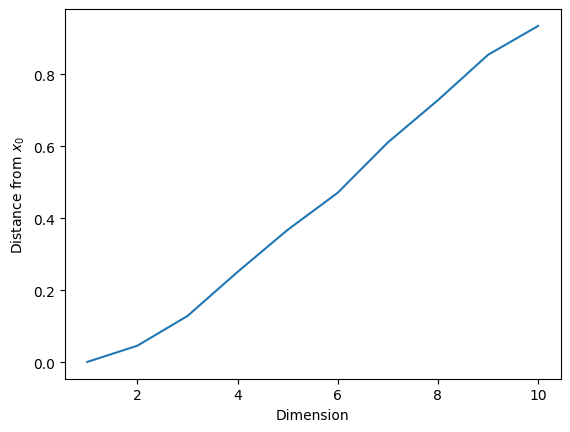

In [240]:
dimensions, errors, variances, sqrd_biases, distances = compute_MSE_or_EPE_against_dimension_p(
    p=10,
    relationship_function=exponential,
    model=skln.KNeighborsRegressor(n_neighbors=1),
    is_knn=True,
    stochastic=False
)

plot_distance_nn_against_dimension_p(dimensions, distances)

Clearly, as the dimension $p$ increases, so does the distance of the nearest neighbour from $x_0$; at $p = 10$, the nearest neighbour is essentially at the edge instead of the centre $x_0$.

#### Plot of MSE against $p$

Since the distances increases against $p$, we would expect the MSE to increase against $p$ as well:

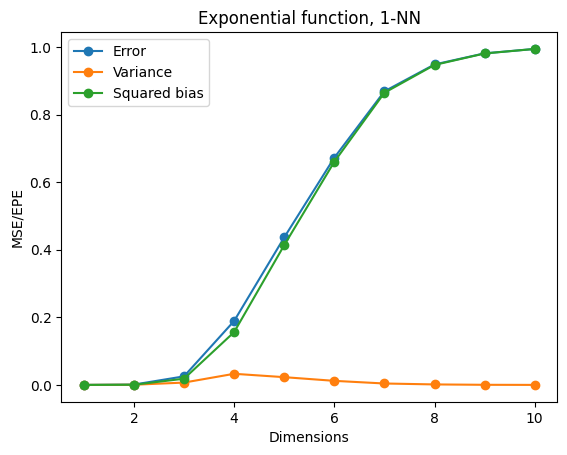

In [241]:
plot_MSE_or_EPE_against_dimension_p(
    dimensions=dimensions,
    errors=errors,
    variances=variances,
    sqrd_biases=sqrd_biases,
    plot_title="Exponential function, 1-NN"
)

As expected, the MSE increases against $p$: as $p$ increases, the nearest neighbour is more often at the boundary of the sample space and is far away from $x_0$, and thus the prediction is zero instead of one, so the MSE tapers off at a deviation of one.

#### Simulated example: cubic relationship

Consider another example where the relationship $f(X)$ is

$$f(X) = \frac{1}{2}(X_1 + 1)^3,$$

i.e. the relationship depends only on the first component of the random input vector $X$. We want to plot the MSE against the dimension $p$ for this relationship:

In [242]:
def cubic(
    sample_points
):
    X1 = sample_points[:,0]
    
    return 0.5 * (X1 + 1) ** 3

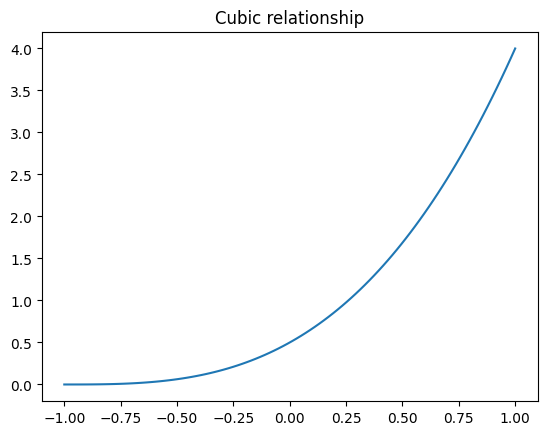

In [243]:
plot_functional_relationship(
    relationship_function=lambda x : 0.5 * (x + 1) ** 3,
    plot_title="Cubic relationship"
)

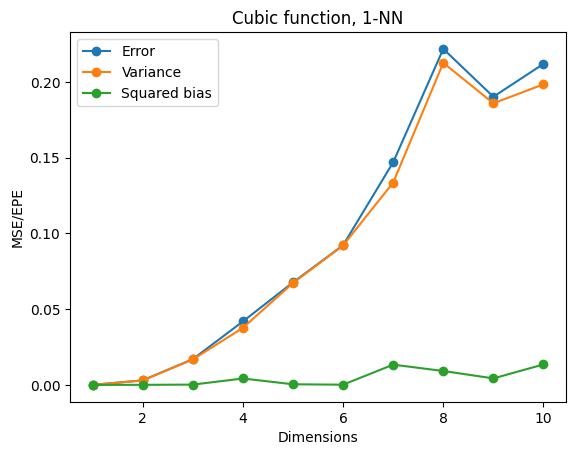

In [244]:
dimensions, errors, variances, sqrd_biases, distances = compute_MSE_or_EPE_against_dimension_p(
    p=10,
    relationship_function=cubic,
    model=skln.KNeighborsRegressor(n_neighbors=1),
    is_knn=True,
    stochastic=False
)

plot_MSE_or_EPE_against_dimension_p(
    dimensions=dimensions,
    errors=errors,
    variances=variances,
    sqrd_biases=sqrd_biases,
    plot_title="Cubic function, 1-NN"
)

We see a similar pattern: the MSE increases against $p$. However, Recall the MSE can be broken down into two components, bias and variance:

$$\text{MSE}(x_0) = \text{Bias}^2(\hat{y_0}) + V[\hat{y_0}].$$

This time, it is the variance that dominates the MSE instead of bias. For a function that depends only on a few dimensions, like the cubic function above, it is the variance that dominates instead of the bias.

### Mitigating the curse of dimensionality

We can mitigate some of the problems of dimensionality by using structured models such as the linear model. To see how we do this, consider the linear model

$$Y = X^T\beta + \epsilon$$

and assume $\epsilon \sim N(0,\sigma)$. Since the quantities are stochastic, we compute EPE instead MSE; MSE implies deterministic, EPE implies stochastic. Thus,

$$\text{EPE} = E_T[y_0 - \hat{y}_0].$$

After a long derivation, which can be found [here](https://waxworksmath.com/Authors/G_M/Hastie/WriteUp/Weatherwax_Epstein_Hastie_Solution_Manual.pdf), we get:

$$\text{EPE} = \sigma (p / N) + \sigma^2$$.

If $N$ is large or $\sigma^2$ is small, the growth in EPE against $p$ is negligible. Thus, it seems we have avoided the curse of dimensionality, but it rests entirely on the assumption that the linear model is accurate for fitting the data.

#### Avoiding the curse of dimensionality using the linear model

We would like to see in practice if the linear model indeed avoids the curse of dimensionality by comparing the EPE relative to a 1NN model in a simulated example; if the linear model indeed avoids the curse of the dimensionality, its EPE should grow more slowly than that the EPE of the 1NN model in the example. We assume the following relationship:

$$Y = X_1 + \epsilon.$$

In [245]:
def linear(
    sample_points
):
    X1 = sample_points[:,0]
    
    return X1

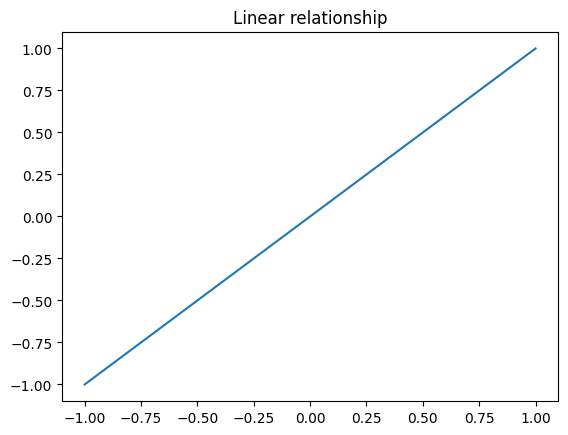

In [246]:
plot_functional_relationship(
    relationship_function=lambda x : x,
    plot_title="Linear relationship"
)

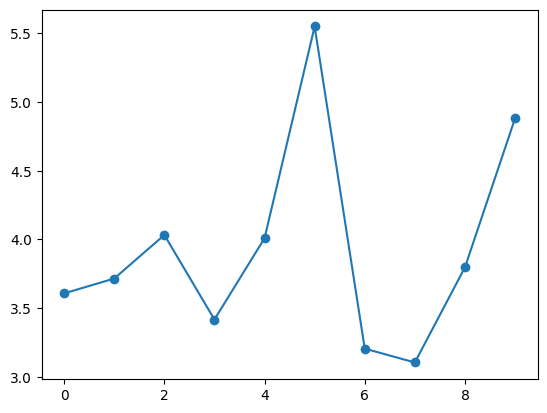

In [262]:
def compare_linear_vs_one_nn_model_EPE():
    dimensions_lm, EPE_lm, = compute_MSE_or_EPE_against_dimension_p(
        p=10,
        relationship_function=cubic,
        model=skllm.LinearRegression(),
        is_knn=False,
        stochastic=True
    )[:2]
    
    dimensions_one_nn, EPE_one_nn, = compute_MSE_or_EPE_against_dimension_p(
        p=10,
        relationship_function=cubic,
        model=skln.KNeighborsRegressor(n_neighbors=1),
        is_knn=True,
        stochastic=True
    )[:2]
    
    fig, ax = plt.subplots()
    
    ax.plot(EPE_one_nn/EPE_lm, marker='o')
    
compare_linear_vs_one_nn_model_EPE()

## Conclusion

We want to use data to build predictive models. Generally, the data might come from a stochastic relationship. However, in machine learning, the data could be deterministic instead of stochastic, e.g. we want train a model using images (pixel data) to predict something; the data are in a sense deterministic. In machine learning, we modify the function itself using the data for prediction. However, in statistical learning, we assume a fixed function with trainable parameters, which we train using the data. Thus, we could say that machine learning is about function modification (use the data to modify function itself), whereas statistial learning is about function approximation (use the data to the modify the parameters in the function).

In statistical learning, one criteria for fitting parameters is using RSS, but the problem is any function that passes exactly through the points is a solution, thus there are infinite solutions. We reduce the number of solutions by restricting the function somehow, e.g. by restricting the amount of roughness in the function.

When we pick hyperparameters, we cannot do so by checking against the prediction error using the training data because we would just pick whatever made the error zero; a better option instead of using the training set is to use a _test_ set (see for example the figure comparing the error against the DOF for the linear vs kNN model).

## Linear regression

$\hat{\beta}$ obtained from $\hat{\beta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$ is not true $\beta$ but rather a sample value given our observations $\mathbf{X}$ and $\mathbf{y}$

$E[\hat{\beta}] = E[(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{Xy} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T(\mathbf{X} \beta + \epsilon)] = \beta$, if $E[\epsilon] = 0$

knowing variance-covariance matrix of random column vector $Z$ is $V[Z] = E[(Z - E[Z])(Z - E[Z])^T]$, it can be shown that $V[\beta] = (\mathbf{X}^T\mathbf{X})^{-1} \sigma^2$ if $V[\epsilon] = \sigma^2$

$\sigma$ can be estimated by sampling $\hat{\sigma}$ as described [here](https://math.stackexchange.com/questions/2277739/why-is-the-denominator-n-p-1-in-estimation-of-variance)

knowing that $\hat{\beta}$ and $\hat{\sigma}$ both follow certain distributions, we can test for signficance using Z scores or F scores as described [here](https://stats.stackexchange.com/questions/344006/understanding-t-test-for-linear-regression)

gauss-markov theorem states that the least-squares estimator of $\beta$ is the best choice for all linear *unbiased* estimates

we can improve however by using an estimator that introduces bias but reduces variance, reducing the MSE overall

note: MSE captures difference between parameter estimator and true parameter value, whereas EPE captures difference between sampled Y value and value predicted using trained model $\hat{f}$

when computing $\hat{\beta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$, inverting $(\mathbf{X}^T\mathbf{X})^{-1}$ is difficult, so QR decomposition which is more numerically stable is used to solve for $\beta$, achieved using Gram-Schmidt process, Householder reflections or Givens rotations

$(\mathbf{X}^T\mathbf{X})^{-1}$ can be difficult to invert if the columns of $\mathbf{X}$ are linearly dependent, i.e., there is multicollinearity in $\mathbf{X}$; reasons are explained [here](https://www.stat.cmu.edu/~larry/=stat401/lecture-17.pdf) (downloaded too)

we can get better prediction accuracy than an OLS estimator by introducing a biased estimator that shrinks some coefficients to zero. this also helps with interpretability by reducing the the number of coefficients

one option is best subset selection where we try all the combinations of features to see which is best, but has $2^n$ complexity

ridge regression is similar to OLS but with the constraint $\sum \beta_j^2 ≤ t$. the RSS expression in ridge regression can be written as

$\text{RSS}^{ridge} = (\mathbf{y} - \mathbf{X}\beta)^T(\mathbf{y} - \mathbf{X}\beta) + \lambda\beta^T\beta$

which can be differentiated with respect to $\beta$, set the derivative to 0 and then solve for $\beta$

$\hat{\beta} = (\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I})^{-1}\mathbf{Xy}$

more insight can be gained into ridge regression by performing a singular value decomposition (SVD) on $\mathbf{X}$. see page 24 of [this document](https://waxworksmath.com/Authors/G_M/Hastie/WriteUp/Weatherwax_Epstein_Hastie_Solution_Manual.pdf)

lasso regression boils down to minimising the RSS but with the constraint $\sum|\beta_j| ≤ t$ and has no closed form solution: it is a quadratic programming problem but can be solved using a modified version of the least angle regression (LAR) algorithm, as per page 68 of ESL

LAR algorithm is described in [this paper](https://tibshirani.su.domains/ftp/lars.pdf)

methods such as principal component regression (PCR) and partial least squares (PLS) focus on modifying the inputs/features to deal with multicollinearity instead of modifying the coefficients $\hat{\beta}$